<a href="https://colab.research.google.com/github/Stefanyym/InOut/blob/main/ASIKK_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASIK II**


1.   Stefany Mariyori
2.   Pardip Maulana



InOut merupakan aplikasi sederhana mengenai klasifikasi terumbu karang, dimana aplikasi ini akan mendeteksi sebuah objek kemudian akan mengeluarkan ouput apakah karang tersebut termasuk dalam karang yang sehat atau tidak (bleaching atau tidak)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import beberapa library yang akan dibutuhkan
import os
import glob as gb
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
#Membuat variabel untuk mengambil dataset pada file yang telah diupload ke GDrive
train_dir = "/content/drive/MyDrive/dataset/train"
test_dir = "/content/drive/MyDrive/dataset/test"
batch_size = 64

In [ ]:
# Melakukan Data Exploration: bagian ini akan menampikan hasil data yang ada di folder train yg berformat jpg
for folder in os.listdir(train_dir):
    files = gb.glob(pathname= str(train_dir+"/"+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 0 in folder Bleached
For training data, found 0 in folder Unbleached
For training data, found 125 in folder Ikan


In [ ]:
# Melakukan Data Exploration: bagian ini akan menampikan hasil data yang ada di folder train yg berformat png
for folder in os.listdir(train_dir):
    files = gb.glob(pathname= str(train_dir+"/"+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 184 in folder Bleached
For training data, found 158 in folder Unbleached
For training data, found 0 in folder Ikan


In [ ]:
# Melakukan Data Exploration: bagian ini akan menampikan hasil data yang ada di folder test yg berformat jpg
for folder in os.listdir(test_dir):
    files = gb.glob(pathname= str(test_dir+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 0 in folder Bleached
For testing data, found 0 in folder Unbleached
For testing data, found 15 in folder Ikan


In [ ]:
# Melakukan Data Exploration: bagian ini akan menampikan hasil data yang ada di folder test yg berformat png
for folder in os.listdir(test_dir):
    files = gb.glob(pathname= str(test_dir+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 17 in folder Bleached
For testing data, found 18 in folder Unbleached
For testing data, found 0 in folder Ikan


In [ ]:
#Menampilkan sample data train secara acak
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    
    target_folder = target_dir + target_class
    
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
#mendeskripsikan label dengan masing-masing nama kelas / class names
class_names = ['Unbleached','Bleached','Ikan']

Image shape (227, 227, 3)
Image shape (800, 1067, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (400, 188, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (720, 1280, 3)
Image shape (227, 227, 3)
Image shape (227, 227, 3)
Image shape (375, 750, 3)


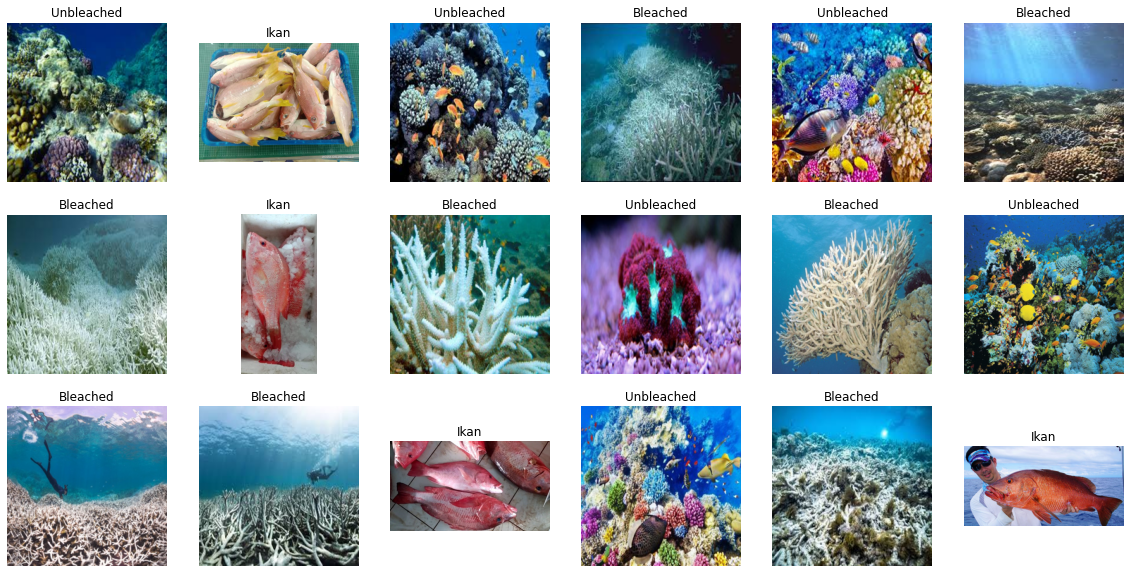

In [ ]:
# Data exploration untuk melihat beberapa hasil gambar yang sudah dilakukan normalisasi beserta labelnya.
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/My Drive/dataset/train/", target_class=class_name)

In [ ]:
#Exploration data dengan cara menlakukan rescale, menyamakan ukuran pixel, hingga menentukan class-mode yang digunakan yaitu categorical karena disini kita menggunakan lebel yang lebih dari 2
from keras.preprocessing.image import ImageDataGenerator
                                   
train_datagen = ImageDataGenerator(rescale = 1./255,        #Melatih data untuk mengenali gambar sekecil mungkin
                                   shear_range = 0.2,       #Melatih data untuk mengenali gambar yang miring ke samping
                                   zoom_range = 0.2,        #Melatih data untuk mengenali gambar ketika zoom in dan zoom out
                                   horizontal_flip = True)  #Melatih data untuk mengenali gambar yang diubah horizontal flip 
               #Untuk memproses data sebelum di load                     
test_datagen = ImageDataGenerator(rescale = 1./255)         

training_set = train_datagen.flow_from_directory(train_dir,                  #Mentraining data yang diambil pada directory dir
                                                 target_size = (128, 128),   #Meresize seluruh ukuran gambar menjadi 128x128
                                                 batch_size = 43,            #Jumlah iterasi yang akan digunakan
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,                       #Mengetest data yang diambil pada directory dir
                                            target_size = (128, 128),        #Meresize seluruh ukuran gambar menjadi 128x128
                                            batch_size = 43,                 #Jumlah iterasi yang akan digunakan
                                            class_mode = 'categorical')

Found 467 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [ ]:
# Pembuatan model menggunakan CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128,128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Lapisan convolution ke-2
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Melihat model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
# training terhadap model yang sudah dibuat untuk menentukan tingkat akurasi yang maksimal
history = classifier.fit(training_set,
                         epochs = 10,
                         validation_data = test_data)

Epoch 1/10
11/11 [==============================] - 35s 3s/step - loss: 1.7661 - accuracy: 0.5203 - val_loss: 0.4912 - val_accuracy: 0.8200
Epoch 2/10
11/11 [==============================] - 10s 862ms/step - loss: 0.4692 - accuracy: 0.8244 - val_loss: 0.4229 - val_accuracy: 0.8400
Epoch 3/10
11/11 [==============================] - 10s 852ms/step - loss: 0.3007 - accuracy: 0.9079 - val_loss: 0.6426 - val_accuracy: 0.8000
Epoch 4/10
11/11 [==============================] - 10s 856ms/step - loss: 0.2866 - accuracy: 0.9058 - val_loss: 0.4752 - val_accuracy: 0.8000
Epoch 5/10
11/11 [==============================] - 11s 1s/step - loss: 0.2666 - accuracy: 0.8994 - val_loss: 0.2550 - val_accuracy: 0.9200
Epoch 6/10
11/11 [==============================] - 13s 1s/step - loss: 0.2270 - accuracy: 0.9079 - val_loss: 0.2404 - val_accuracy: 0.9400
Epoch 7/10
11/11 [==============================] - 13s 1s/step - loss: 0.1932 - accuracy: 0.9379 - val_loss: 0.2481 - val_accuracy: 0.9200
Epoch 8/10


In [ ]:
#Melihat nilai akurasi model pada epoch yang terakhir
classifier.evaluate(test_data)

2/2 [==============================] - 1s 34ms/step - loss: 0.2635 - accuracy: 0.9400


[0.26350104808807373, 0.9399999976158142]

Text(0, 0.5, 'Loss')

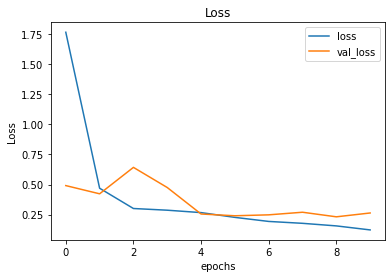

In [ ]:
#Menampilkan line chart dari nilai label loss dan validasi loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

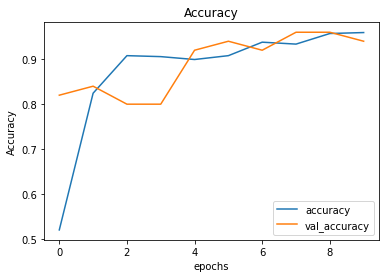

In [ ]:
#Menampilkan line chart dari nilai label akurasi dan validasi akurasi
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [ ]:
classifier.save('model1.h5')  # menyimpan model yang telah dibuat dengan format .h5

In [ ]:
#Melakukan testing dari model yang telah dibuat
#Memanggil jalur model yang telah disimpan 
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

#Mengimport library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
#Memasukkan gambar ikan yang akan dipresiksi jenisnya
image = cv2.imread("/content/drive/MyDrive/dataset/test/Bleached/11.png")
#mengubah gambar menjadi data angka agar dapat diproses oleh komputer
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))   
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255
#Memprediksi model data 
pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 68ms/step


0

In [ ]:
#Memperlihatkan nilai index dari masing-masing label jenis ikan
training_set.class_indices

{'Bleached': 0, 'Ikan': 1, 'Unbleached': 2}

In [ ]:
#Melakukan testing dari model yang telah dibuat
#Memanggil jalur model yang telah disimpan 
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

#Mengimport library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
#Memasukkan gambar ikan yang akan dipresiksi jenisnya
image = cv2.imread("/content/drive/MyDrive/dataset/test/Unbleached/31.png")
#mengubah gambar menjadi data angka agar dapat diproses oleh komputer
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))   
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255
#Memprediksi model data 
pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 66ms/step


2